<a href="https://colab.research.google.com/github/gioguarnieri/Materias_Doutorado_INPE/blob/main/Estat%C3%ADstica_Computacional/CAP417HandsOn2_Giovanni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 417 - PARTE C - HANDS-ON 02 - 2022

 Prof: Reinaldo Rosa

 Aluno: Giovanni Guarnieri Soares

In [9]:
%%capture
!pip install colorednoise 
!pip install -U kaleido # needed to the images

In [10]:
import numpy as np
import plotly.graph_objects as go # plotting module
import pandas as pd
import plotly.io as pio

pio.renderers.default = "png" # setting png as default so images appear in github

In [11]:
from scipy.stats import skew, kurtosis
def cullenfrey(df):
    # Gaussian x Non-Gaussian (The Kullen-Frey Parameter Space)
    m=df.mean()
    std=df.std()
    s=df.skew()
    k1=df.kurtosis()
    k2=k1+3
    #Parâmetros de Cullen-Frey
    ss=s*s
    k=k2
    mean, std = 0, 0.1 # mean and standard deviation
    samples = 4096
    A = np.random.normal(mean, std, size=samples)
    Gauss_skew = skew(A)**2
    Gauss_kurt = kurtosis(A)+3
    # Ploting Cullen-Frey Space

    maior = np.max([ss, k])

    polyX1 = maior if maior > 4.4 else 4.4
    polyY1 = polyX1 + 1
    polyY2 = 3/2.*polyX1 + 3
    y_lim = polyY2 if polyY2 > 5 else 5

    x = [0, polyX1, polyX1, 0]
    y = [1, polyY1, polyY2, 3]

    # poly2X1 = maior if maior > 2.15 else 2.15
    poly2Y2 = 2.62*polyX1 + 3
    x2 = [0, polyX1, polyX1, 0]
    y2 = [3, polyY2, poly2Y2, 3]

    scale = 1
    fig = go.Figure(go.Scatter(x=x, y=y, fill="toself", name = "beta function"))
    fig.add_trace(go.Scatter(x=x2, y=y2, fill="toself", name = "GEV"))
    fig.update_yaxes(autorange="reversed") 
    fig.add_trace(go.Scatter(x=[Gauss_skew], y = [Gauss_kurt], mode = "markers", name = "Gaussian", marker_symbol = "star", marker_size = 15))
    for i in df.columns:
      fig.add_trace(go.Scatter(x=[ss[i]], y = [k[i]], mode = "markers", name = i+" observation"))
    fig.add_trace(go.Scatter(x=[0], y=[4.187999875999753], name="logistic", mode = "markers", marker_symbol = "x", marker_size = 15, marker_color= "black"))
    fig.add_trace(go.Scatter(x=[0], y=[1.7962675925351856], name="uniform", mode = "markers", marker_symbol = "hexagram", marker_size = 15, marker_color= "black"))
    fig.add_trace(go.Scatter(x=[4], y=[9], name="exponential", mode = "markers", marker_symbol = "circle-x", marker_size = 15, marker_color= "black"))
    fig.add_trace(go.Scatter(x = np.arange(0, polyX1, 0.1), y = 3/2. * np.arange(0, polyX1, 0.1) + 3, name="gamma", mode = "lines",  line = dict(color='black', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x = np.arange(0, polyX1, 0.1), y = 2 * np.arange(0, polyX1, 0.1) + 3, name="lognormal", mode = "lines",line = dict(color='black', width=4, dash='dash')))
    fig.update_layout(
        title="Cullen-Frey graph",
        yaxis_title="Kurtosis",
        xaxis_title="Skewness²",
        legend_title="Distributions",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="black"
    )
)
    return fig

In [12]:
dfendo = pd.read_csv('endo.csv', header = None)
dfexo = pd.read_csv('exo.csv', header = None)

dfs = pd.concat([dfexo, dfendo], axis=1, join='inner')
dfs.columns = ["exo", "endo"]
x = dfs[ dfs["endo"] < 3*np.std(dfs["endo"]) ]["endo"]
dfs.insert(0,"endo_cut",x)
x = dfs[ dfs["exo"] < 3*np.std(dfs["exo"]) ]["exo"]
dfs.insert(0,"exo_cut",x)
dfs

,exo_cut,endo_cut,exo,endo
0,2.78590,1.02060,2.78590,1.02060
1,2.21130,0.53477,2.21130,0.53477
2,2.55760,0.53329,2.55760,0.53329
3,0.82921,0.88739,0.82921,0.88739
4,3.06160,1.59790,3.06160,1.59790
...,...,...,...,...
4091,-0.17712,1.22160,-0.17712,1.22160
4092,0.59423,0.78092,0.59423,0.78092
4093,0.81878,0.82637,0.81878,0.82637
4094,1.66360,0.80606,1.66360,0.80606


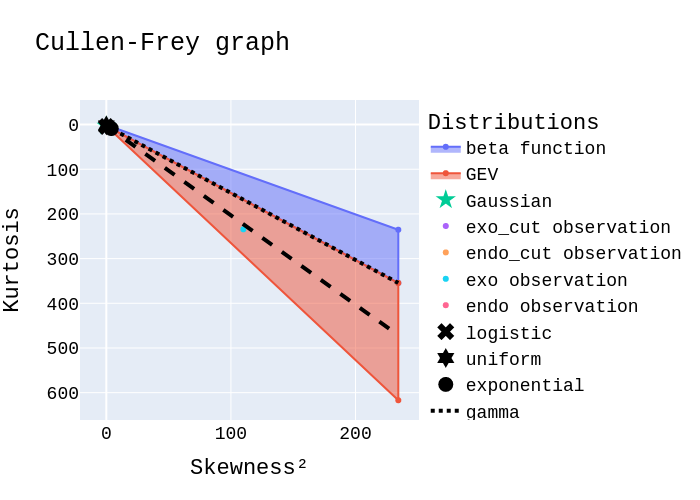

In [13]:
cullenfrey(dfs).show()

Já que a série exógena é mais isolada das outras, temos então que retirá-la para uma visualiação melhor

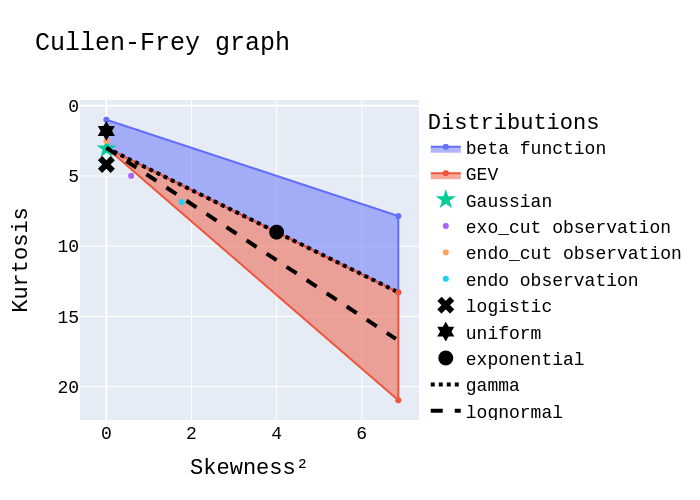

In [14]:
cullenfrey(dfs.drop(columns="exo")).show()

Desta forma, obtemos o gráfico de Cullen-Frey com a GEV